In [164]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy import interpolate

#Import some image analysis functions
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

import sys
import pickle

%matplotlib notebook

In [4]:
def norm_by_avg_init(data):
    ndata = data / np.mean(data[1:10])
    #ndata = data / data.min()
    return ndata


### Data from 11/6 (images were taken with the 4x objective)

In [5]:
main_dir = "Y:\\Dennis Terwilliger\\Data\\"
sub_dir = "2020-11-06\\"
filenm = "2020-11-06 Trios Data.csv"

up_ramp_05Hz_1106 = np.loadtxt(main_dir+sub_dir+filenm, delimiter=',', skiprows = 6, usecols = (1,2,3), max_rows=500)
up_ramp_4Hz_1106 = np.loadtxt(main_dir+sub_dir+filenm, delimiter=',', skiprows = 6, usecols = (5,6,7), max_rows=500)
up_ramp_8Hz_01_1106 = np.loadtxt(main_dir+sub_dir+filenm, delimiter=',', skiprows = 6, usecols = (9,10,11), max_rows=500)
up_ramp_12Hz_1106 = np.loadtxt(main_dir+sub_dir+filenm, delimiter=',', skiprows = 6, usecols = (13,14,15))
up_ramp_8Hz_02_1106 = np.loadtxt(main_dir+sub_dir+filenm, delimiter=',', skiprows = 6, usecols = (17,18,19))


<IPython.core.display.Javascript object>


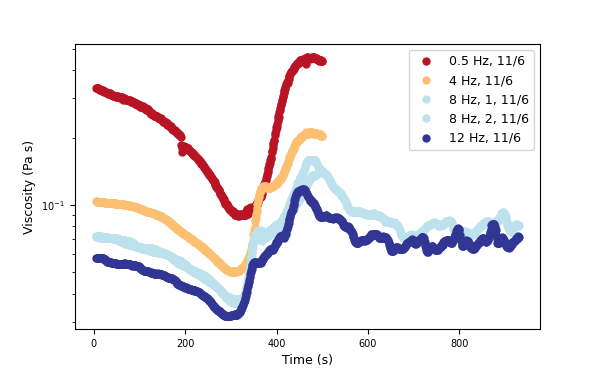

In [6]:
skip_time = 4
cmap = matplotlib.cm.get_cmap('RdYlBu')

figsize = 6.0
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10

plt.semilogy(up_ramp_05Hz_1106[skip_time:,1], (up_ramp_05Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.5/12),label="0.5 Hz, 11/6")
plt.semilogy(up_ramp_4Hz_1106[skip_time:,1], (up_ramp_4Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(4./12),label="4 Hz, 11/6")
plt.semilogy(up_ramp_8Hz_01_1106[skip_time:,1], (up_ramp_8Hz_01_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 1, 11/6")
plt.semilogy(up_ramp_8Hz_02_1106[skip_time:,1], (up_ramp_8Hz_02_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 2, 11/6")
plt.semilogy(up_ramp_12Hz_1106[skip_time:,1], (up_ramp_12Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(12./12),label="12 Hz, 11/6")


plt.xlabel("Time (s)",fontsize=9)
plt.ylabel("Viscosity (Pa s)",fontsize=9)
plt.legend(loc=0,fontsize=9)

<IPython.core.display.Javascript object>


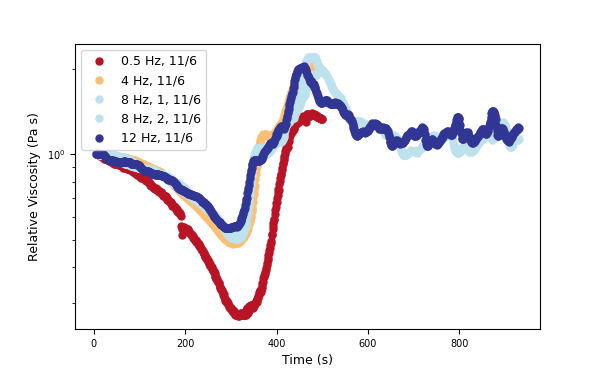

In [7]:
skip_time = 4
cmap = matplotlib.cm.get_cmap('RdYlBu')

figsize = 6.0
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10

plt.semilogy(up_ramp_05Hz_1106[skip_time:,1], norm_by_avg_init(up_ramp_05Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.5/12),label="0.5 Hz, 11/6")
plt.semilogy(up_ramp_4Hz_1106[skip_time:,1], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(4./12),label="4 Hz, 11/6")
plt.semilogy(up_ramp_8Hz_01_1106[skip_time:,1], norm_by_avg_init(up_ramp_8Hz_01_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 1, 11/6")
plt.semilogy(up_ramp_8Hz_02_1106[skip_time:,1], norm_by_avg_init(up_ramp_8Hz_02_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 2, 11/6")
plt.semilogy(up_ramp_12Hz_1106[skip_time:,1], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(12./12),label="12 Hz, 11/6")


plt.xlabel("Time (s)",fontsize=9)
plt.ylabel("Relative Viscosity (Pa s)",fontsize=9)
plt.legend(loc=0,fontsize=9)

<IPython.core.display.Javascript object>


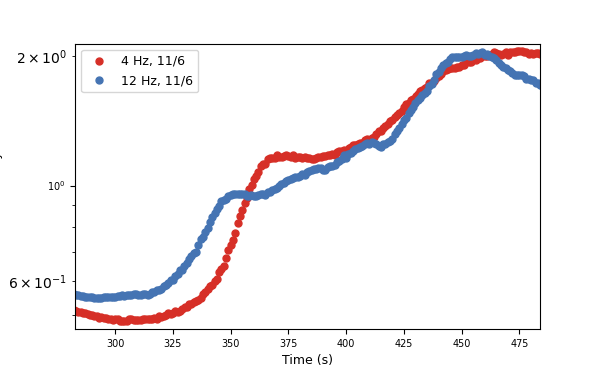

In [8]:
skip_time = 4
cmap = matplotlib.cm.get_cmap('RdYlBu')

figsize = 6.0
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10

#plt.semilogy(up_ramp_05Hz_1106[skip_time:,1], norm_by_avg_init(up_ramp_05Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.5/12),label="0.5 Hz, 11/6")
plt.semilogy(up_ramp_4Hz_1106[skip_time:,1], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.1),label="4 Hz, 11/6")
#plt.semilogy(up_ramp_8Hz_01_1106[skip_time:,1], norm_by_avg_init(up_ramp_8Hz_01_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 1, 11/6")
#plt.semilogy(up_ramp_8Hz_02_1106[skip_time:,1], norm_by_avg_init(up_ramp_8Hz_02_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 2, 11/6")
plt.semilogy(up_ramp_12Hz_1106[skip_time:,1], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.9),label="12 Hz, 11/6")


plt.xlabel("Time (s)",fontsize=9)
plt.ylabel("Relative Viscosity (Pa s)",fontsize=9)
plt.legend(loc=0,fontsize=9)

<IPython.core.display.Javascript object>


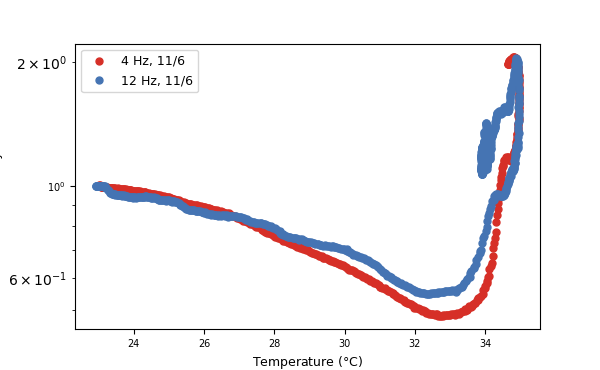

In [11]:
skip_time = 4
cmap = matplotlib.cm.get_cmap('RdYlBu')

figsize = 6.0
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10

#plt.semilogy(up_ramp_05Hz_1106[skip_time:,2], norm_by_avg_init(up_ramp_05Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.5/12),label="0.5 Hz, 11/6")
plt.semilogy(up_ramp_4Hz_1106[skip_time:,2], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.1),label="4 Hz, 11/6")
#plt.semilogy(up_ramp_8Hz_01_1106[skip_time:,2], norm_by_avg_init(up_ramp_8Hz_01_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 1, 11/6")
#plt.semilogy(up_ramp_8Hz_02_1106[skip_time:,2], norm_by_avg_init(up_ramp_8Hz_02_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(8./12),label="8 Hz, 2, 11/6")
plt.semilogy(up_ramp_12Hz_1106[skip_time:,2], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:,0]),'.',ms=markerSize,c=cmap(0.9),label="12 Hz, 11/6")


plt.xlabel("Temperature ($\degree$C)",fontsize=9)
plt.ylabel("Relative Viscosity (Pa s)",fontsize=9)
plt.legend(loc=0,fontsize=9)

## Correlating with the image autocorrelation analysis

In [181]:
main_dir_05hz = "Y:\\Dennis Terwilliger\\Data\\2020-11-06\\01_Temp Ramp 0.5Hz\\Temp Ramp_0.5Hz_(23-34Deg)4x\\"

movie_num = 3
data_dir = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize200.p" % movie_num
data_dump_file = open(main_dir_05hz+data_dir+data_file,'rb')
sia_05hz_3 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 4
data_dir = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize200.p" % movie_num
data_dump_file = open(main_dir_05hz+data_dir+data_file,'rb')
sia_05hz_4 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 5
data_dir = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize200.p" % movie_num
data_dump_file = open(main_dir_05hz+data_dir+data_file,'rb')
sia_05hz_5 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 6
data_dir = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize200.p" % movie_num
data_dump_file = open(main_dir_05hz+data_dir+data_file,'rb')
sia_05hz_6 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 7
data_dir = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize200.p" % movie_num
data_dump_file = open(main_dir_05hz+data_dir+data_file,'rb')
sia_05hz_7 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 8
data_dir = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize200.p" % movie_num
data_dump_file = open(main_dir_05hz+data_dir+data_file,'rb')
sia_05hz_8 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 9
data_dir = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_0.5Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize200.p" % movie_num
data_dump_file = open(main_dir_05hz+data_dir+data_file,'rb')
sia_05hz_9 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()


In [123]:
main_dir_4hz = "Y:\\Dennis Terwilliger\\Data\\2020-11-06\\02_Temp Ramp 4Hz\\Temp Ramp_4Hz_(23-34Deg)4x\\"

movie_num = 3
data_dir = "Temp Ramp_4Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_4Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_4hz+data_dir+data_file,'rb')
sia_4hz_3 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 4
data_dir = "Temp Ramp_4Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_4Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_4hz+data_dir+data_file,'rb')
sia_4hz_4 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 5
data_dir = "Temp Ramp_4Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_4Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_4hz+data_dir+data_file,'rb')
sia_4hz_5 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 6
data_dir = "Temp Ramp_4Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_4Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_4hz+data_dir+data_file,'rb')
sia_4hz_6 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 7
data_dir = "Temp Ramp_4Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_4Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_4hz+data_dir+data_file,'rb')
sia_4hz_7 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 8
data_dir = "Temp Ramp_4Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_4Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_4hz+data_dir+data_file,'rb')
sia_4hz_8 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 9
data_dir = "Temp Ramp_4Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_4Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_4hz+data_dir+data_file,'rb')
sia_4hz_9 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

In [100]:
sia_4hz_4.keys()

dict_keys(['data_dir', 'filtersize', 'frames_analyzed', 'num_frames_to_avg', 'every', 'corr_images', 'af', 'af_upto20'])

In [124]:
main_dir_12hz = "Y:\\Dennis Terwilliger\\Data\\2020-11-06\\04_Temp Ramp 12Hz\\Temp Ramp_12Hz_(23-34Deg)4x\\"

movie_num = 3
data_dir = "Temp Ramp_12Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_12Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_12hz+data_dir+data_file,'rb')
sia_12hz_3 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 4
data_dir = "Temp Ramp_12Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_12Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_12hz+data_dir+data_file,'rb')
sia_12hz_4 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 5
data_dir = "Temp Ramp_12Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_12Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_12hz+data_dir+data_file,'rb')
sia_12hz_5 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 6
data_dir = "Temp Ramp_12Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_12Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_12hz+data_dir+data_file,'rb')
sia_12hz_6 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 7
data_dir = "Temp Ramp_12Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_12Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_12hz+data_dir+data_file,'rb')
sia_12hz_7 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 8
data_dir = "Temp Ramp_12Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_12Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_12hz+data_dir+data_file,'rb')
sia_12hz_8 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

movie_num = 9
data_dir = "Temp Ramp_12Hz_(23-34Deg)4x_%i\\" % movie_num
data_file = "Temp Ramp_12Hz_(23-34Deg)4x_%i__pickleddata_redo_filtsize500.p" % movie_num
data_dump_file = open(main_dir_12hz+data_dir+data_file,'rb')
sia_12hz_9 = pickle.load(data_dump_file,encoding='bytes')
data_dump_file.close()

In [102]:
sia_4hz_8.keys()

dict_keys(['data_dir', 'filtersize', 'frames_analyzed', 'num_frames_to_avg', 'every', 'corr_images', 'af', 'af_upto20'])

In [103]:
sia_12hz_8.keys()


dict_keys(['data_dir', 'filtersize', 'frames_analyzed', 'num_frames_to_avg', 'every', 'corr_images', 'af', 'af_upto20'])

In [105]:
sia_4hz_8['corr_images'].shape
print(492/2)
print(596/2)

246.0
298.0


In [182]:
start_times_videos_05hz = np.array([267,290,316,340,366,389,416,439,468,492])
start_times_videos_4hz = np.array([258,281,307,333,356,379,405,428,450,478])
start_times_videos_12hz = np.array([257,283,309,333,358,384,407,437,460,684])

In [168]:
time_to_temp = interpolate.interp1d(up_ramp_4Hz_1106[:,1],up_ramp_4Hz_1106[:,2])

In [107]:
def ycorr_values(dictionary_data, val, start_time, b=True):
    if b:
        ycorr_sia = np.zeros((dictionary_data[b'corr_images'].shape[0], 247))
        nx,ny = dictionary_data[b'corr_images'][0].shape
    else:
        ycorr_sia = np.zeros((dictionary_data['corr_images'].shape[0], 247))
        nx,ny = dictionary_data['corr_images'][0].shape
    ycorr_sia_val= np.zeros((ycorr_sia.shape[0]))
    x_mid = int(nx/2); y_mid = int(ny/2)
    xvalues = np.arange(x_mid+1)*0.501
    for i in range(len(ycorr_sia_val)):
        if b:
            slice_sia = np.flip(dictionary_data[b'corr_images'][i,0:x_mid+1, y_mid])
        else:
            slice_sia = np.flip(dictionary_data['corr_images'][i,0:x_mid+1, y_mid])
        ycorr_sia[i] = slice_sia
        w = np.argmin(np.abs(slice_sia-val))
        ycorr_sia_val[i] = xvalues[w]
    times_to_analyze = start_time + np.arange(0,2000,25)/88.
    return ycorr_sia_val, times_to_analyze

def xcorr_values(dictionary_data, val, start_time, b=True):
    if b:
        xcorr_sia = np.zeros((dictionary_data[b'corr_images'].shape[0], 299))
        nx,ny = dictionary_data[b'corr_images'][0].shape
    else:
        xcorr_sia = np.zeros((dictionary_data['corr_images'].shape[0], 299))
        nx,ny = dictionary_data['corr_images'][0].shape
    xcorr_sia_val= np.zeros((xcorr_sia.shape[0]))
    x_mid = int(nx/2); y_mid = int(ny/2)
    yvalues = np.arange(y_mid+1)*0.501
    for i in range(len(xcorr_sia_val)):
        if b:
            slice_sia = np.flip(dictionary_data[b'corr_images'][i,x_mid, 0:y_mid+1])
        else:
            slice_sia = np.flip(dictionary_data['corr_images'][i,x_mid, 0:y_mid+1])
        xcorr_sia[i] = slice_sia
        w = np.argmin(np.abs(slice_sia-val))
        xcorr_sia_val[i] = yvalues[w]
    times_to_analyze = start_time + np.arange(0,2000,25)/88.
    return xcorr_sia_val, times_to_analyze
    

In [186]:
#val = 0.6321
val = 0.367

ycorr4_3_50, times_to_analyze4_4 = ycorr_values(sia_4hz_3, val, start_times_videos_4hz[2],b=False)
ycorr4_4_50, times_to_analyze4_4 = ycorr_values(sia_4hz_4, val, start_times_videos_4hz[3],b=False)
ycorr4_5_50, times_to_analyze4_5 = ycorr_values(sia_4hz_5, val, start_times_videos_4hz[4],b=False)
ycorr4_6_50, times_to_analyze4_6 = ycorr_values(sia_4hz_6, val, start_times_videos_4hz[5],b=False)
ycorr4_7_50, times_to_analyze4_7 = ycorr_values(sia_4hz_7, val, start_times_videos_4hz[6],b=False)
ycorr4_8_50, times_to_analyze4_8 = ycorr_values(sia_4hz_8, val, start_times_videos_4hz[7],b=False)
ycorr4_9_50, times_to_analyze4_9 = ycorr_values(sia_4hz_9, val, start_times_videos_4hz[8],b=False)
xcorr4_3_50, times_to_analyze4_3 = xcorr_values(sia_4hz_3, val, start_times_videos_4hz[2],b=False)
xcorr4_4_50, times_to_analyze4_4 = xcorr_values(sia_4hz_4, val, start_times_videos_4hz[3],b=False)
xcorr4_5_50, times_to_analyze4_5 = xcorr_values(sia_4hz_5, val, start_times_videos_4hz[4],b=False)
xcorr4_6_50, times_to_analyze4_6 = xcorr_values(sia_4hz_6, val, start_times_videos_4hz[5],b=False)
xcorr4_7_50, times_to_analyze4_7 = xcorr_values(sia_4hz_7, val, start_times_videos_4hz[6],b=False)
xcorr4_8_50, times_to_analyze4_8 = xcorr_values(sia_4hz_8, val, start_times_videos_4hz[7],b=False)
xcorr4_9_50, times_to_analyze4_9 = xcorr_values(sia_4hz_9, val, start_times_videos_4hz[8],b=False)

ycorr12_3_50, times_to_analyze12_3 = ycorr_values(sia_12hz_3, val, start_times_videos_12hz[2], b=False)
ycorr12_4_50, times_to_analyze12_4 = ycorr_values(sia_12hz_4, val, start_times_videos_12hz[3], b=False)
ycorr12_5_50, times_to_analyze12_5 = ycorr_values(sia_12hz_5, val, start_times_videos_12hz[4], b=False)
ycorr12_6_50, times_to_analyze12_6 = ycorr_values(sia_12hz_6, val, start_times_videos_12hz[5], b=False)
ycorr12_7_50, times_to_analyze12_7 = ycorr_values(sia_12hz_7, val, start_times_videos_12hz[6], b=False)
ycorr12_8_50, times_to_analyze12_8 = ycorr_values(sia_12hz_8, val, start_times_videos_12hz[7], b=False)
ycorr12_9_50, times_to_analyze12_9 = ycorr_values(sia_12hz_9, val, start_times_videos_12hz[8], b=False)
xcorr12_3_50, times_to_analyze12_3 = xcorr_values(sia_12hz_3, val, start_times_videos_12hz[2], b=False)
xcorr12_4_50, times_to_analyze12_4 = xcorr_values(sia_12hz_4, val, start_times_videos_12hz[3], b=False)
xcorr12_5_50, times_to_analyze12_5 = xcorr_values(sia_12hz_5, val, start_times_videos_12hz[4], b=False)
xcorr12_6_50, times_to_analyze12_6 = xcorr_values(sia_12hz_6, val, start_times_videos_12hz[5], b=False)
xcorr12_7_50, times_to_analyze12_7 = xcorr_values(sia_12hz_7, val, start_times_videos_12hz[6], b=False)
xcorr12_8_50, times_to_analyze12_8 = xcorr_values(sia_12hz_8, val, start_times_videos_12hz[7], b=False)
xcorr12_9_50, times_to_analyze12_9 = xcorr_values(sia_12hz_9, val, start_times_videos_12hz[8], b=False)

ycorr05_3_50, times_to_analyze05_3 = ycorr_values(sia_05hz_3, val, start_times_videos_05hz[2], b=False)
ycorr05_4_50, times_to_analyze05_4 = ycorr_values(sia_05hz_4, val, start_times_videos_05hz[3], b=False)
ycorr05_5_50, times_to_analyze05_5 = ycorr_values(sia_05hz_5, val, start_times_videos_05hz[4], b=False)
ycorr05_6_50, times_to_analyze05_6 = ycorr_values(sia_05hz_6, val, start_times_videos_05hz[5], b=False)
ycorr05_7_50, times_to_analyze05_7 = ycorr_values(sia_05hz_7, val, start_times_videos_05hz[6], b=False)
ycorr05_8_50, times_to_analyze05_8 = ycorr_values(sia_05hz_8, val, start_times_videos_05hz[7], b=False)
ycorr05_9_50, times_to_analyze05_9 = ycorr_values(sia_05hz_9, val, start_times_videos_05hz[8], b=False)
xcorr05_3_50, times_to_analyze05_3 = xcorr_values(sia_05hz_3, val, start_times_videos_05hz[2], b=False)
xcorr05_4_50, times_to_analyze05_4 = xcorr_values(sia_05hz_4, val, start_times_videos_05hz[3], b=False)
xcorr05_5_50, times_to_analyze05_5 = xcorr_values(sia_05hz_5, val, start_times_videos_05hz[4], b=False)
xcorr05_6_50, times_to_analyze05_6 = xcorr_values(sia_05hz_6, val, start_times_videos_05hz[5], b=False)
xcorr05_7_50, times_to_analyze05_7 = xcorr_values(sia_05hz_7, val, start_times_videos_05hz[6], b=False)
xcorr05_8_50, times_to_analyze05_8 = xcorr_values(sia_05hz_8, val, start_times_videos_05hz[7], b=False)
xcorr05_9_50, times_to_analyze05_9 = xcorr_values(sia_05hz_9, val, start_times_videos_05hz[8], b=False)

In [153]:
sia_12hz_4['af'][:,1:].shape

(80, 199)

<IPython.core.display.Javascript object>


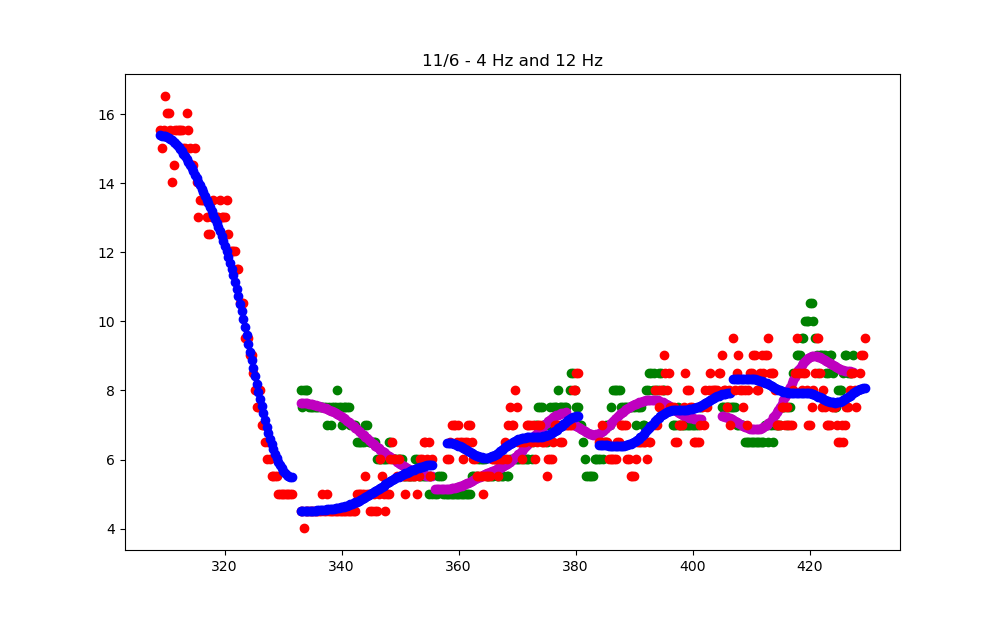

<IPython.core.display.Javascript object>


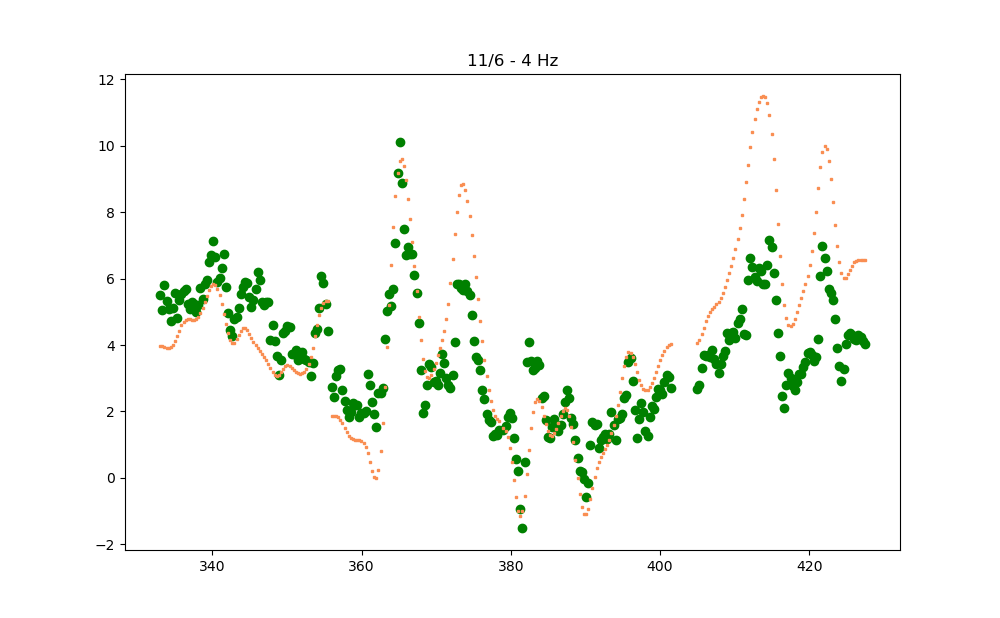

<IPython.core.display.Javascript object>


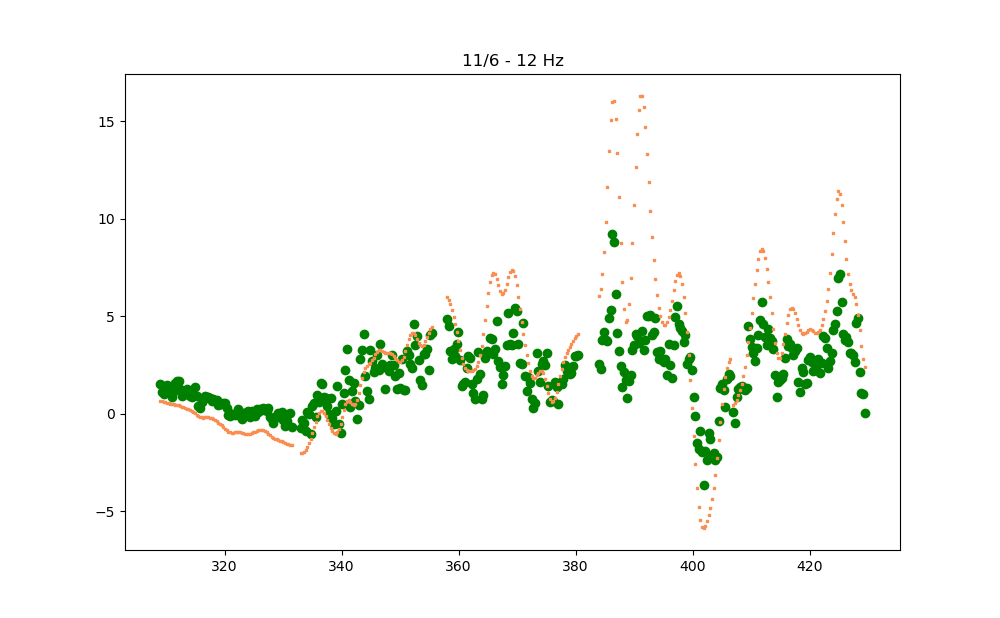

Text(0.5, 1.0, '11/6 - 12 Hz')

In [154]:
figsize = 10.0
gf_size = 10
markSize=2
start = 1
end = 50

fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
plt.plot(times_to_analyze4_4,ycorr4_4_50,'go')
plt.plot(times_to_analyze4_4,gf1d(ycorr4_4_50,gf_size),'mo')
plt.plot(times_to_analyze4_5,ycorr4_5_50,'go')
plt.plot(times_to_analyze4_5,gf1d(ycorr4_5_50,gf_size),'mo')
plt.plot(times_to_analyze4_6,ycorr4_6_50,'go')
plt.plot(times_to_analyze4_6,gf1d(ycorr4_6_50,gf_size),'mo')
plt.plot(times_to_analyze4_7,ycorr4_7_50,'go')
plt.plot(times_to_analyze4_7,gf1d(ycorr4_7_50,gf_size),'mo')

'''
plt.plot(times_to_analyze4_4,xcorr4_4_50,'go')
plt.plot(times_to_analyze4_4,gf1d(xcorr4_4_50,gf_size),'mo')
plt.plot(times_to_analyze4_5,xcorr4_5_50,'go')
plt.plot(times_to_analyze4_5,gf1d(xcorr4_5_50,gf_size),'mo')
plt.plot(times_to_analyze4_6,xcorr4_6_50,'go')
plt.plot(times_to_analyze4_6,gf1d(xcorr4_6_50,gf_size),'mo')
plt.plot(times_to_analyze4_7,xcorr4_7_50,'go')
plt.plot(times_to_analyze4_7,gf1d(xcorr4_7_50,gf_size),'mo')
'''

plt.plot(times_to_analyze12_3,ycorr12_3_50,'ro')
plt.plot(times_to_analyze12_3,gf1d(ycorr12_3_50,gf_size),'bo')
plt.plot(times_to_analyze12_4,ycorr12_4_50,'ro')
plt.plot(times_to_analyze12_4,gf1d(ycorr12_4_50,gf_size),'bo')
plt.plot(times_to_analyze12_5,ycorr12_5_50,'ro')
plt.plot(times_to_analyze12_5,gf1d(ycorr12_5_50,gf_size),'bo')
plt.plot(times_to_analyze12_6,ycorr12_6_50,'ro')
plt.plot(times_to_analyze12_6,gf1d(ycorr12_6_50,gf_size),'bo')
plt.plot(times_to_analyze12_7,ycorr12_7_50,'ro')
plt.plot(times_to_analyze12_7,gf1d(ycorr12_7_50,gf_size),'bo')


'''
plt.plot(times_to_analyze12_3,xcorr12_3_50,'ro')
plt.plot(times_to_analyze12_3,gf1d(xcorr12_3_50,gf_size),'bo')
plt.plot(times_to_analyze12_4,xcorr12_4_50,'ro')
plt.plot(times_to_analyze12_4,gf1d(xcorr12_4_50,gf_size),'bo')
plt.plot(times_to_analyze12_5,xcorr12_5_50,'ro')
plt.plot(times_to_analyze12_5,gf1d(xcorr12_5_50,gf_size),'bo')
plt.plot(times_to_analyze12_6,xcorr12_6_50,'ro')
plt.plot(times_to_analyze12_6,gf1d(xcorr12_6_50,gf_size),'bo')
plt.plot(times_to_analyze12_7,xcorr12_7_50,'ro')
plt.plot(times_to_analyze12_7,gf1d(xcorr12_7_50,gf_size),'bo')
'''

plt.title("11/6 - 4 Hz and 12 Hz")

figsize = 10.0
gf_size = 3
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
plt.plot(times_to_analyze4_4,sia_4hz_4['af_upto20'],'go')
plt.plot(times_to_analyze4_5,sia_4hz_5['af_upto20'],'go')
plt.plot(times_to_analyze4_6,sia_4hz_6['af_upto20'],'go')
plt.plot(times_to_analyze4_7,sia_4hz_7['af_upto20'],'go')
plt.plot(times_to_analyze4_4,gf1d(sia_4hz_4['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze4_5,gf1d(sia_4hz_5['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze4_6,gf1d(sia_4hz_6['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze4_7,gf1d(sia_4hz_7['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.title("11/6 - 4 Hz")

figsize = 10.0
gf_size = 3
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
plt.plot(times_to_analyze12_3,sia_12hz_3['af_upto20'],'go')
plt.plot(times_to_analyze12_4,sia_12hz_4['af_upto20'],'go')
plt.plot(times_to_analyze12_5,sia_12hz_5['af_upto20'],'go')
plt.plot(times_to_analyze12_6,sia_12hz_6['af_upto20'],'go')
plt.plot(times_to_analyze12_7,sia_12hz_7['af_upto20'],'go')
plt.plot(times_to_analyze12_3,gf1d(sia_12hz_3['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_4,gf1d(sia_12hz_4['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_5,gf1d(sia_12hz_5['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_6,gf1d(sia_12hz_6['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_7,gf1d(sia_12hz_7['af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
plt.title("11/6 - 12 Hz")

<IPython.core.display.Javascript object>


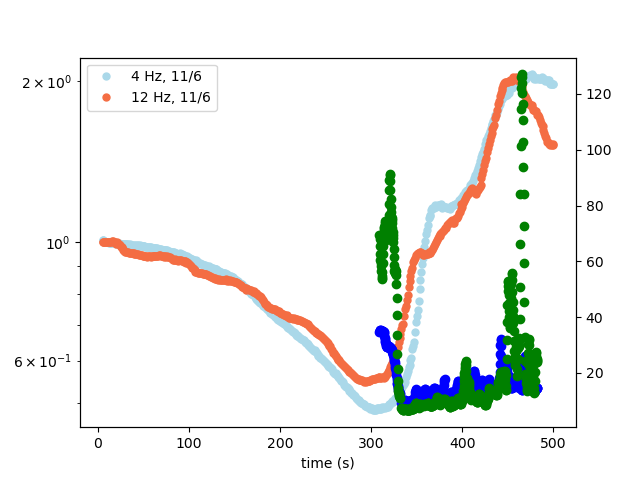

In [189]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("time (s)")
ax1.semilogy(up_ramp_4Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.7),label="4 Hz, 11/6")
ax1.semilogy(up_ramp_12Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.2),label="12 Hz, 11/6")

ax2 = ax1.twinx()
'''
gf_size=3
ax2.plot(times_to_analyze4_4,sia_4hz_4[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_5,sia_4hz_5[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_6,sia_4hz_6[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_7,sia_4hz_7[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_4,gf1d(sia_4hz_4[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
ax2.plot(times_to_analyze4_5,gf1d(sia_4hz_5[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
ax2.plot(times_to_analyze4_6,gf1d(sia_4hz_6[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
ax2.plot(times_to_analyze4_7,gf1d(sia_4hz_7[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
'''
gf_size=2

plt.plot(times_to_analyze12_3,gf1d(ycorr12_3_50,gf_size),'bo')
plt.plot(times_to_analyze12_4,gf1d(ycorr12_4_50,gf_size),'bo')
plt.plot(times_to_analyze12_5,gf1d(ycorr12_5_50,gf_size),'bo')
plt.plot(times_to_analyze12_6,gf1d(ycorr12_6_50,gf_size),'bo')
plt.plot(times_to_analyze12_7,gf1d(ycorr12_7_50,gf_size),'bo')
plt.plot(times_to_analyze12_8,gf1d(ycorr12_8_50,gf_size),'bo')
plt.plot(times_to_analyze12_9,gf1d(ycorr12_9_50,gf_size),'bo')

plt.plot(times_to_analyze12_3,gf1d(xcorr12_3_50,gf_size),'go')
plt.plot(times_to_analyze12_4,gf1d(xcorr12_4_50,gf_size),'go')
plt.plot(times_to_analyze12_5,gf1d(xcorr12_5_50,gf_size),'go')
plt.plot(times_to_analyze12_6,gf1d(xcorr12_6_50,gf_size),'go')
plt.plot(times_to_analyze12_7,gf1d(xcorr12_7_50,gf_size),'go')
plt.plot(times_to_analyze12_8,gf1d(xcorr12_8_50,gf_size),'go')
plt.plot(times_to_analyze12_9,gf1d(xcorr12_9_50,gf_size),'go')

ax1.legend(loc=0)


<IPython.core.display.Javascript object>


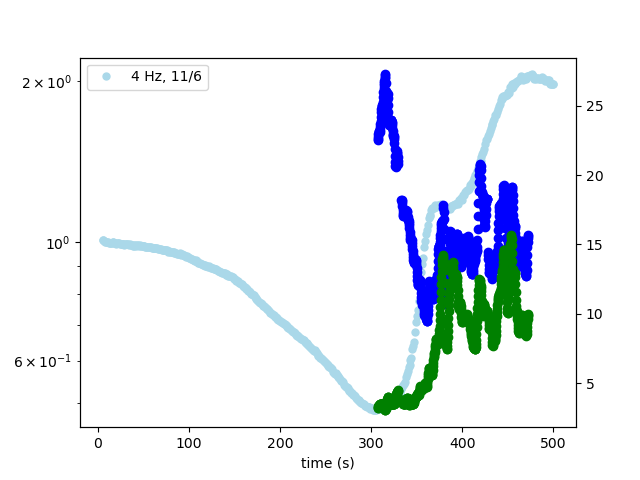

In [188]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("time (s)")
ax1.semilogy(up_ramp_4Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.7),label="4 Hz, 11/6")
#ax1.semilogy(up_ramp_12Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.2),label="12 Hz, 11/6")

ax2 = ax1.twinx()
gf_size=2

plt.plot(times_to_analyze4_3,gf1d(ycorr4_3_50,gf_size),'bo')
plt.plot(times_to_analyze4_4,gf1d(ycorr4_4_50,gf_size),'bo')
plt.plot(times_to_analyze4_5,gf1d(ycorr4_5_50,gf_size),'bo')
plt.plot(times_to_analyze4_6,gf1d(ycorr4_6_50,gf_size),'bo')
plt.plot(times_to_analyze4_7,gf1d(ycorr4_7_50,gf_size),'bo')
plt.plot(times_to_analyze4_8,gf1d(ycorr4_8_50,gf_size),'bo')
plt.plot(times_to_analyze4_9,gf1d(ycorr4_9_50,gf_size),'bo')

plt.plot(times_to_analyze4_3,gf1d(xcorr4_3_50,gf_size),'go')
plt.plot(times_to_analyze4_4,gf1d(xcorr4_4_50,gf_size),'go')
plt.plot(times_to_analyze4_5,gf1d(xcorr4_5_50,gf_size),'go')
plt.plot(times_to_analyze4_6,gf1d(xcorr4_6_50,gf_size),'go')
plt.plot(times_to_analyze4_7,gf1d(xcorr4_7_50,gf_size),'go')
plt.plot(times_to_analyze4_8,gf1d(xcorr4_8_50,gf_size),'go')
plt.plot(times_to_analyze4_9,gf1d(xcorr4_9_50,gf_size),'go')

ax1.legend(loc=0)

<IPython.core.display.Javascript object>


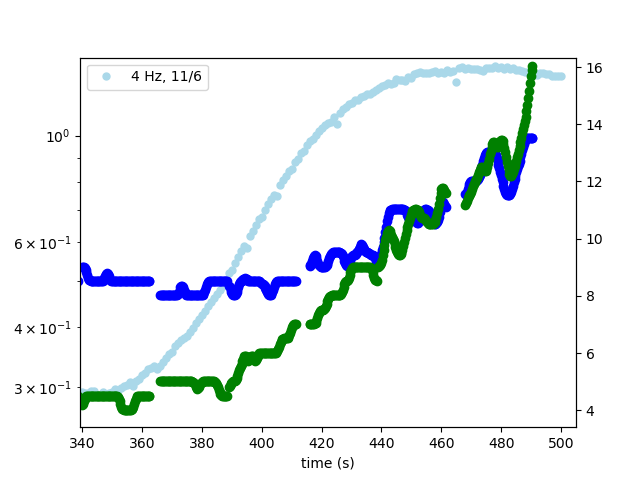

In [187]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("time (s)")
ax1.semilogy(up_ramp_05Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_05Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.7),label="4 Hz, 11/6")
#ax1.semilogy(up_ramp_12Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.2),label="12 Hz, 11/6")

ax2 = ax1.twinx()
gf_size=2

plt.plot(times_to_analyze05_3,gf1d(ycorr05_3_50,gf_size),'bo')
plt.plot(times_to_analyze05_4,gf1d(ycorr05_4_50,gf_size),'bo')
plt.plot(times_to_analyze05_5,gf1d(ycorr05_5_50,gf_size),'bo')
plt.plot(times_to_analyze05_6,gf1d(ycorr05_6_50,gf_size),'bo')
plt.plot(times_to_analyze05_7,gf1d(ycorr05_7_50,gf_size),'bo')
plt.plot(times_to_analyze05_8,gf1d(ycorr05_8_50,gf_size),'bo')
plt.plot(times_to_analyze05_9,gf1d(ycorr05_9_50,gf_size),'bo')

plt.plot(times_to_analyze05_3,gf1d(xcorr05_3_50,gf_size),'go')
plt.plot(times_to_analyze05_4,gf1d(xcorr05_4_50,gf_size),'go')
plt.plot(times_to_analyze05_5,gf1d(xcorr05_5_50,gf_size),'go')
plt.plot(times_to_analyze05_6,gf1d(xcorr05_6_50,gf_size),'go')
plt.plot(times_to_analyze05_7,gf1d(xcorr05_7_50,gf_size),'go')
plt.plot(times_to_analyze05_8,gf1d(xcorr05_8_50,gf_size),'go')
plt.plot(times_to_analyze05_9,gf1d(xcorr05_9_50,gf_size),'go')

ax1.legend(loc=0)

<IPython.core.display.Javascript object>


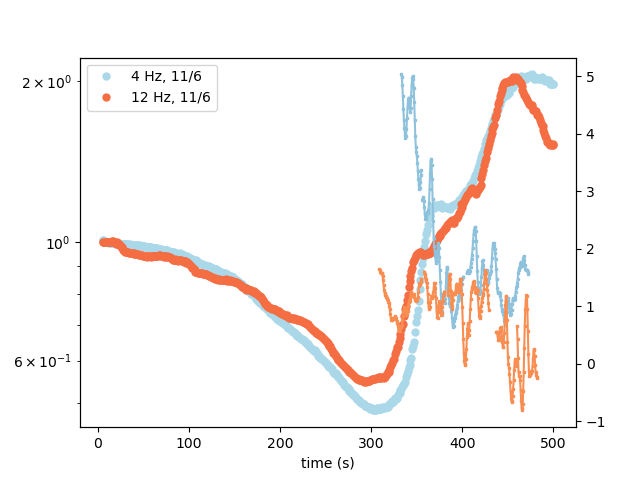

In [174]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("time (s)")
ax1.semilogy(up_ramp_4Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.7),label="4 Hz, 11/6")
ax1.semilogy(up_ramp_12Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.2),label="12 Hz, 11/6")

ax2 = ax1.twinx()

start = 1
end = 25

gf_size=3
every = 2
plt.plot(times_to_analyze4_4[::every],gf1d(sia_4hz_4['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.75),ms=markSize)
plt.plot(times_to_analyze4_5[::every],gf1d(sia_4hz_5['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.75),ms=markSize)
plt.plot(times_to_analyze4_6[::every],gf1d(sia_4hz_6['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.75),ms=markSize)
plt.plot(times_to_analyze4_7[::every],gf1d(sia_4hz_7['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.75),ms=markSize)
plt.plot(times_to_analyze4_8[::every],gf1d(sia_4hz_8['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.75),ms=markSize)
plt.plot(times_to_analyze4_9[::every],gf1d(sia_4hz_9['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.75),ms=markSize)


plt.plot(times_to_analyze12_3[::every],gf1d(sia_12hz_3['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_4[::every],gf1d(sia_12hz_4['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_5[::every],gf1d(sia_12hz_5['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_6[::every],gf1d(sia_12hz_6['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_7[::every],gf1d(sia_12hz_7['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_8[::every],gf1d(sia_12hz_8['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.25),ms=markSize)
plt.plot(times_to_analyze12_9[::every],gf1d(sia_12hz_9['af'][:,start:end].sum(axis=1),gf_size)[::every],'-s',c=cmap(0.25),ms=markSize)


ax1.legend(loc=0)

In [163]:
up_ramp_4Hz_1106[:,2]

array([23.02, 23.  , 23.03, 23.01, 23.01, 23.03, 23.04, 23.05, 23.05,
       23.05, 23.07, 23.09, 23.08, 23.1 , 23.1 , 23.11, 23.13, 23.16,
       23.15, 23.18, 23.18, 23.21, 23.22, 23.24, 23.26, 23.27, 23.28,
       23.31, 23.34, 23.34, 23.36, 23.37, 23.4 , 23.42, 23.44, 23.46,
       23.47, 23.5 , 23.52, 23.54, 23.56, 23.57, 23.59, 23.62, 23.64,
       23.66, 23.69, 23.71, 23.73, 23.75, 23.79, 23.79, 23.84, 23.85,
       23.87, 23.89, 23.9 , 23.93, 23.97, 23.97, 24.  , 24.04, 24.06,
       24.08, 24.11, 24.12, 24.15, 24.17, 24.21, 24.24, 24.23, 24.29,
       24.31, 24.33, 24.35, 24.39, 24.4 , 24.43, 24.46, 24.5 , 24.53,
       24.54, 24.56, 24.6 , 24.62, 24.65, 24.7 , 24.7 , 24.73, 24.76,
       24.78, 24.81, 24.84, 24.86, 24.92, 24.93, 24.97, 25.01, 25.03,
       25.06, 25.09, 25.11, 25.14, 25.17, 25.22, 25.24, 25.26, 25.3 ,
       25.32, 25.37, 25.4 , 25.44, 25.45, 25.5 , 25.52, 25.56, 25.6 ,
       25.62, 25.66, 25.7 , 25.72, 25.76, 25.8 , 25.83, 25.86, 25.9 ,
       25.93, 25.98,

In [166]:
time_to_temp(200)

array(28.71804)

In [167]:
time_to_temp(np.array([100,200,300]))

array([25.05916, 28.71804, 32.60888])

<IPython.core.display.Javascript object>


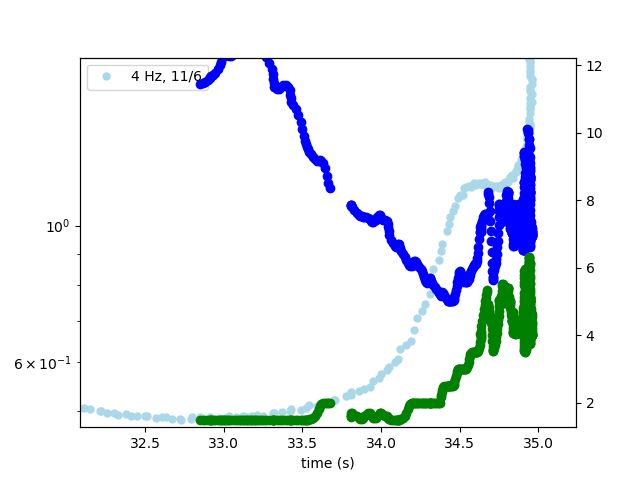

In [170]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("time (s)")
ax1.semilogy(up_ramp_4Hz_1106[skip_time:500,2], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.7),label="4 Hz, 11/6")
#ax1.semilogy(up_ramp_12Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.2),label="12 Hz, 11/6")

ax2 = ax1.twinx()
gf_size=2

plt.plot(time_to_temp(times_to_analyze4_3),gf1d(ycorr4_3_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_4),gf1d(ycorr4_4_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_5),gf1d(ycorr4_5_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_6),gf1d(ycorr4_6_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_7),gf1d(ycorr4_7_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_8),gf1d(ycorr4_8_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_9),gf1d(ycorr4_9_50,gf_size),'bo')

plt.plot(time_to_temp(times_to_analyze4_3),gf1d(xcorr4_3_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_4),gf1d(xcorr4_4_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_5),gf1d(xcorr4_5_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_6),gf1d(xcorr4_6_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_7),gf1d(xcorr4_7_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_8),gf1d(xcorr4_8_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_9),gf1d(xcorr4_9_50,gf_size),'go')

ax1.legend(loc=0)

<IPython.core.display.Javascript object>


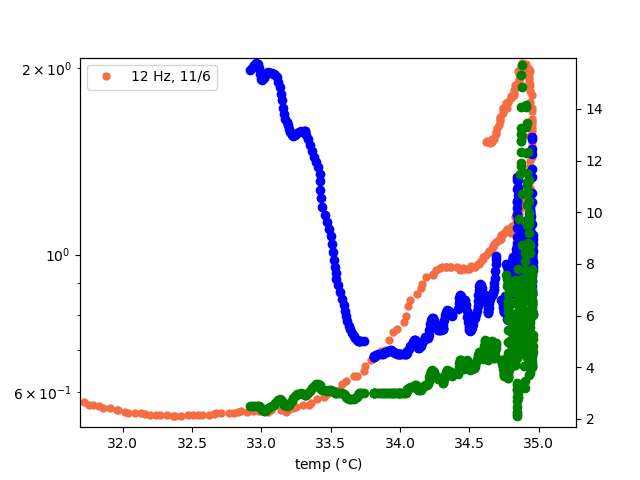

In [171]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("temp ($\degree$C)")
#ax1.semilogy(up_ramp_4Hz_1106[skip_time:500,1], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.7),label="4 Hz, 11/6")
ax1.semilogy(up_ramp_12Hz_1106[skip_time:500,2], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.2),label="12 Hz, 11/6")

ax2 = ax1.twinx()
'''
gf_size=3
ax2.plot(times_to_analyze4_4,sia_4hz_4[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_5,sia_4hz_5[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_6,sia_4hz_6[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_7,sia_4hz_7[b'af_upto20'],'go')
ax2.plot(times_to_analyze4_4,gf1d(sia_4hz_4[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
ax2.plot(times_to_analyze4_5,gf1d(sia_4hz_5[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
ax2.plot(times_to_analyze4_6,gf1d(sia_4hz_6[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
ax2.plot(times_to_analyze4_7,gf1d(sia_4hz_7[b'af'][:,start:end].sum(axis=1),gf_size),'s',c=cmap(0.25),ms=markSize)
'''
gf_size=2

plt.plot(time_to_temp(times_to_analyze12_3),gf1d(ycorr12_3_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_4),gf1d(ycorr12_4_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_5),gf1d(ycorr12_5_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_6),gf1d(ycorr12_6_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_7),gf1d(ycorr12_7_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_8),gf1d(ycorr12_8_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_9),gf1d(ycorr12_9_50,gf_size),'bo')

plt.plot(time_to_temp(times_to_analyze12_3),gf1d(xcorr12_3_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_4),gf1d(xcorr12_4_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_5),gf1d(xcorr12_5_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_6),gf1d(xcorr12_6_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_7),gf1d(xcorr12_7_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_8),gf1d(xcorr12_8_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_9),gf1d(xcorr12_9_50,gf_size),'go')

ax1.legend(loc=0)

<IPython.core.display.Javascript object>


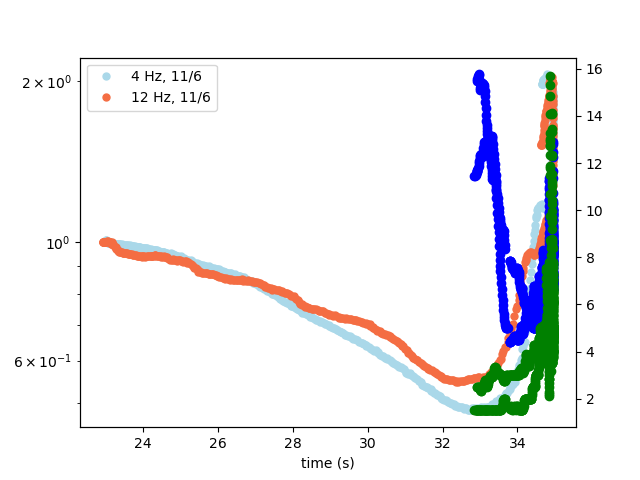

In [172]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("Temperature ($\degree$C)")
ax1.semilogy(up_ramp_4Hz_1106[skip_time:500,2], norm_by_avg_init(up_ramp_4Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.7),label="4 Hz, 11/6")
ax1.semilogy(up_ramp_12Hz_1106[skip_time:500,2], norm_by_avg_init(up_ramp_12Hz_1106[skip_time:500,0]),'.',ms=markerSize,c=cmap(0.2),label="12 Hz, 11/6")

ax2 = ax1.twinx()
gf_size=2

plt.plot(time_to_temp(times_to_analyze4_3),gf1d(ycorr4_3_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_4),gf1d(ycorr4_4_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_5),gf1d(ycorr4_5_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_6),gf1d(ycorr4_6_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_7),gf1d(ycorr4_7_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_8),gf1d(ycorr4_8_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze4_9),gf1d(ycorr4_9_50,gf_size),'bo')

plt.plot(time_to_temp(times_to_analyze4_3),gf1d(xcorr4_3_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_4),gf1d(xcorr4_4_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_5),gf1d(xcorr4_5_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_6),gf1d(xcorr4_6_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_7),gf1d(xcorr4_7_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_8),gf1d(xcorr4_8_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze4_9),gf1d(xcorr4_9_50,gf_size),'go')

plt.plot(time_to_temp(times_to_analyze12_3),gf1d(ycorr12_3_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_4),gf1d(ycorr12_4_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_5),gf1d(ycorr12_5_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_6),gf1d(ycorr12_6_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_7),gf1d(ycorr12_7_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_8),gf1d(ycorr12_8_50,gf_size),'bo')
plt.plot(time_to_temp(times_to_analyze12_9),gf1d(ycorr12_9_50,gf_size),'bo')

plt.plot(time_to_temp(times_to_analyze12_3),gf1d(xcorr12_3_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_4),gf1d(xcorr12_4_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_5),gf1d(xcorr12_5_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_6),gf1d(xcorr12_6_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_7),gf1d(xcorr12_7_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_8),gf1d(xcorr12_8_50,gf_size),'go')
plt.plot(time_to_temp(times_to_analyze12_9),gf1d(xcorr12_9_50,gf_size),'go')

ax1.legend(loc=0)

<IPython.core.display.Javascript object>


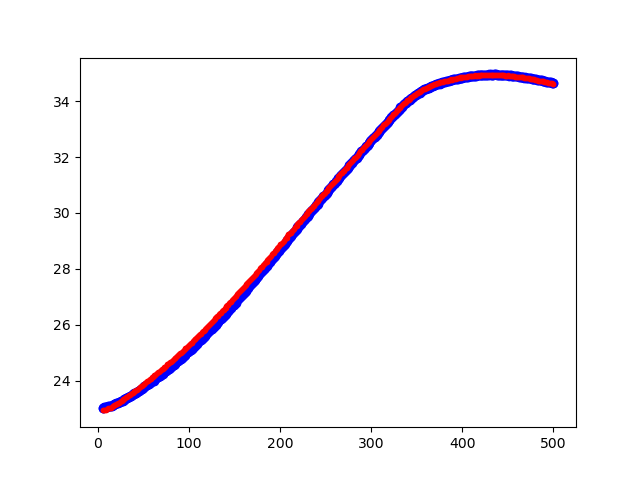

In [178]:
plt.figure()
plt.plot(up_ramp_4Hz_1106[skip_time:500,1], up_ramp_4Hz_1106[skip_time:500,2],'bo')
plt.plot(up_ramp_12Hz_1106[skip_time:500,1], up_ramp_12Hz_1106[skip_time:500,2],'r.')